In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio
%matplotlib inline

In [5]:
from sklearn.decomposition import PCA

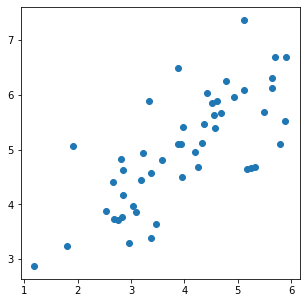

In [12]:
raw_data = sio.loadmat('ex7data1.mat')

X = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X['X1'], X['X2'])

In [38]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = X.to_numpy()
    cov = np.dot(X.T,X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V
U, S, V = pca(X)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.70081977, 0.25918023]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

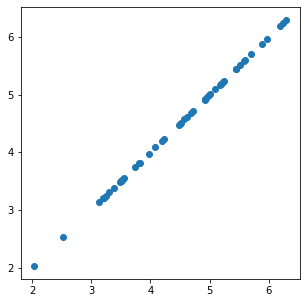

In [43]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)
Z = project_data(X, U, 1)

def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)
X_recovered = recover_data(Z, U, 1)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_recovered[:,0], X_recovered[:,0])

In [46]:
K = 1
pca = PCA(n_components=K)
pca.fit(X)  

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.explained_variance_ratio_

array([0.87062385])

In [48]:
pca.singular_values_

array([10.1677938])

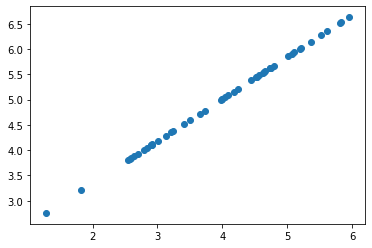

In [58]:
Z = pca.transform(X)
X_recovered = pca.inverse_transform(Z)
plt.scatter(X_recovered[:,0], X_recovered[:,1])

In [57]:
X_recovered[0].shape

(2,)

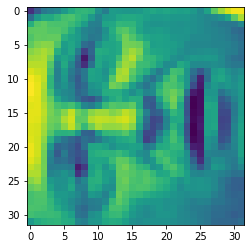

In [83]:
faces = sio.loadmat('ex7faces.mat')
X = faces['X']
face = np.reshape(X[3,:], (32, 32))
plt.imshow(face)

In [87]:
K = 50
pca = PCA(n_components=K)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [88]:
Z = pca.transform(X)
X_recovered = pca.inverse_transform(Z)

In [89]:
X.shape

(5000, 1024)

In [90]:
Z.shape

(5000, 50)

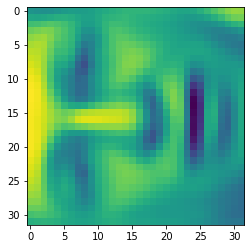

In [91]:
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)